# Forecasting Electricity Load of Houston
(10 points Total)
### **Data Set**
A Cross-Domain Data Hub to Track the Impact of COVID-19 on U.S. Electricity Markets

https://github.com/tamu-engineering-research/COVID-EMDA

Particularly, we will use the electricity load data of Houston.

https://raw.githubusercontent.com/tamu-engineering-research/COVID-EMDA/master/data_release/ercot/ercot_houston_load.csv

### **Problem**
1. carry out component decomposition for the electricity load of Houston (2 points)

2. build an ARIMA model with an optimal order (p, d, q) (5 points)

3. make a prediction for the next 30 days, plot it out, and explain your results (3 points)

## Download and Process Dataset
**Please don't change this section!**

You can use the dataframe `df` for the rest of your analysis.

In [ ]:
DATA_URL="https://raw.githubusercontent.com/tamu-engineering-research/COVID-EMDA/master/data_release/ercot/ercot_houston_load.csv"

In [ ]:
# import pandas, numpy and seaborn. sns.set() will set multiple theme parameters in one step for seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [ ]:
# read the data and change the index to datetime index to facilitate the analysis.
df=pd.read_csv(DATA_URL)
df["date"] = pd.to_datetime(df["date"])
df.set_index(pd.to_datetime(df.date, format="%Y-%m-%d"), inplace=True)
df.drop(["date"], axis=1, inplace=True)
df.head(5)

,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,8791.8,8569.7,8326.4,8137.5,8011.9,7978.1,8057.1,8125.8,8289.2,8646.5,...,9957.6,9987.9,9943.9,10181.0,10583.5,10451.0,10230.6,10014.8,9667.7,9287.7
2017-01-02,8836.8,8588.2,8480.8,8506.0,8644.7,8887.0,9176.5,9323.8,9559.9,9602.7,...,10937.1,11037.0,10931.5,10859.0,11112.1,10893.9,10594.2,10196.7,9568.1,8935.5
2017-01-03,8516.6,8238.2,8102.8,8094.3,8265.7,8816.3,9615.5,10009.8,10102.3,10235.3,...,11022.6,10988.9,10883.8,10882.0,11092.8,10889.1,10577.2,10100.1,9488.8,8916.9
2017-01-04,8462.0,8316.5,8259.6,8336.3,8636.6,9357.1,10504.8,10955.0,10944.0,11119.8,...,10713.0,10602.9,10638.3,11099.4,11605.9,11578.6,11416.8,11010.9,10392.6,9784.5
2017-01-05,9472.0,9198.3,9051.1,9031.1,9237.9,9836.5,10685.2,10931.8,10841.5,10912.8,...,10692.5,10696.2,10791.9,11130.9,11378.8,11311.2,11194.9,10882.2,10416.8,9959.7


In [ ]:
df['load']= df.sum(axis=1)
df = df[["load"]]
df.head(5)

,load
date,
2017-01-01,220989.4
2017-01-02,235680.6
2017-01-03,237534.1
2017-01-04,247560.4
2017-01-05,251129.3


<Axes: xlabel='date'>

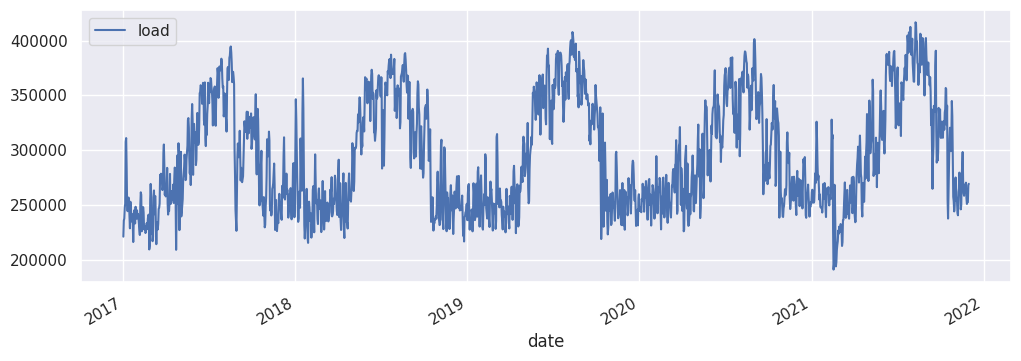

In [ ]:
df.plot()

In [ ]:
df

,load
date,
2017-01-01,220989.4
2017-01-02,235680.6
2017-01-03,237534.1
2017-01-04,247560.4
2017-01-05,251129.3
...,...
2021-11-26,250892.4
2021-11-27,252661.7
2021-11-28,252618.8


## Component Decomposition

In [ ]:
# Creating a time series
t=np.linspace(-1, 5, num=500)
f_trend=2.0*t + t*np.sin(t**2)
f_seasonality=3*np.sin(20*t)
f_noise=2*np.random.randn(len(t))
f_final = f_trend + f_seasonality + f_noise
df_decomp= pd.DataFrame({"t": t,
                  "X": f_final,
                  "Trend" : f_trend,
                  "Seasonality": f_seasonality,
                  "Noise": f_noise
                  })

In [ ]:
df_decomp

,t,X,Trend,Seasonality,Noise
0,-1.000000,-4.440410,-2.841471,-2.738836,1.139897
1,-0.987976,-4.842395,-2.794309,-2.368443,0.320357
2,-0.975952,-2.812863,-2.747165,-1.861740,1.796042
3,-0.963928,-1.776908,-2.700073,-1.247888,2.171054
4,-0.951904,-5.516217,-2.653067,-0.562217,-2.300933
...,...,...,...,...,...
495,4.951904,8.249807,7.061384,-2.990900,4.179323
496,4.963928,4.388964,7.582241,-2.849223,-0.344054
497,4.975952,6.444831,8.140264,-2.543565,0.848132
498,4.987976,6.336396,8.728200,-2.091518,-0.300287


<Axes: >

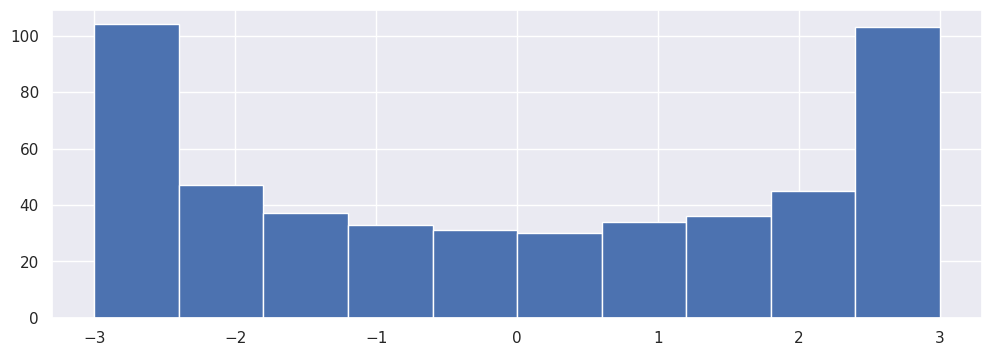

In [ ]:
df_decomp["Seasonality"].hist()

<Axes: >

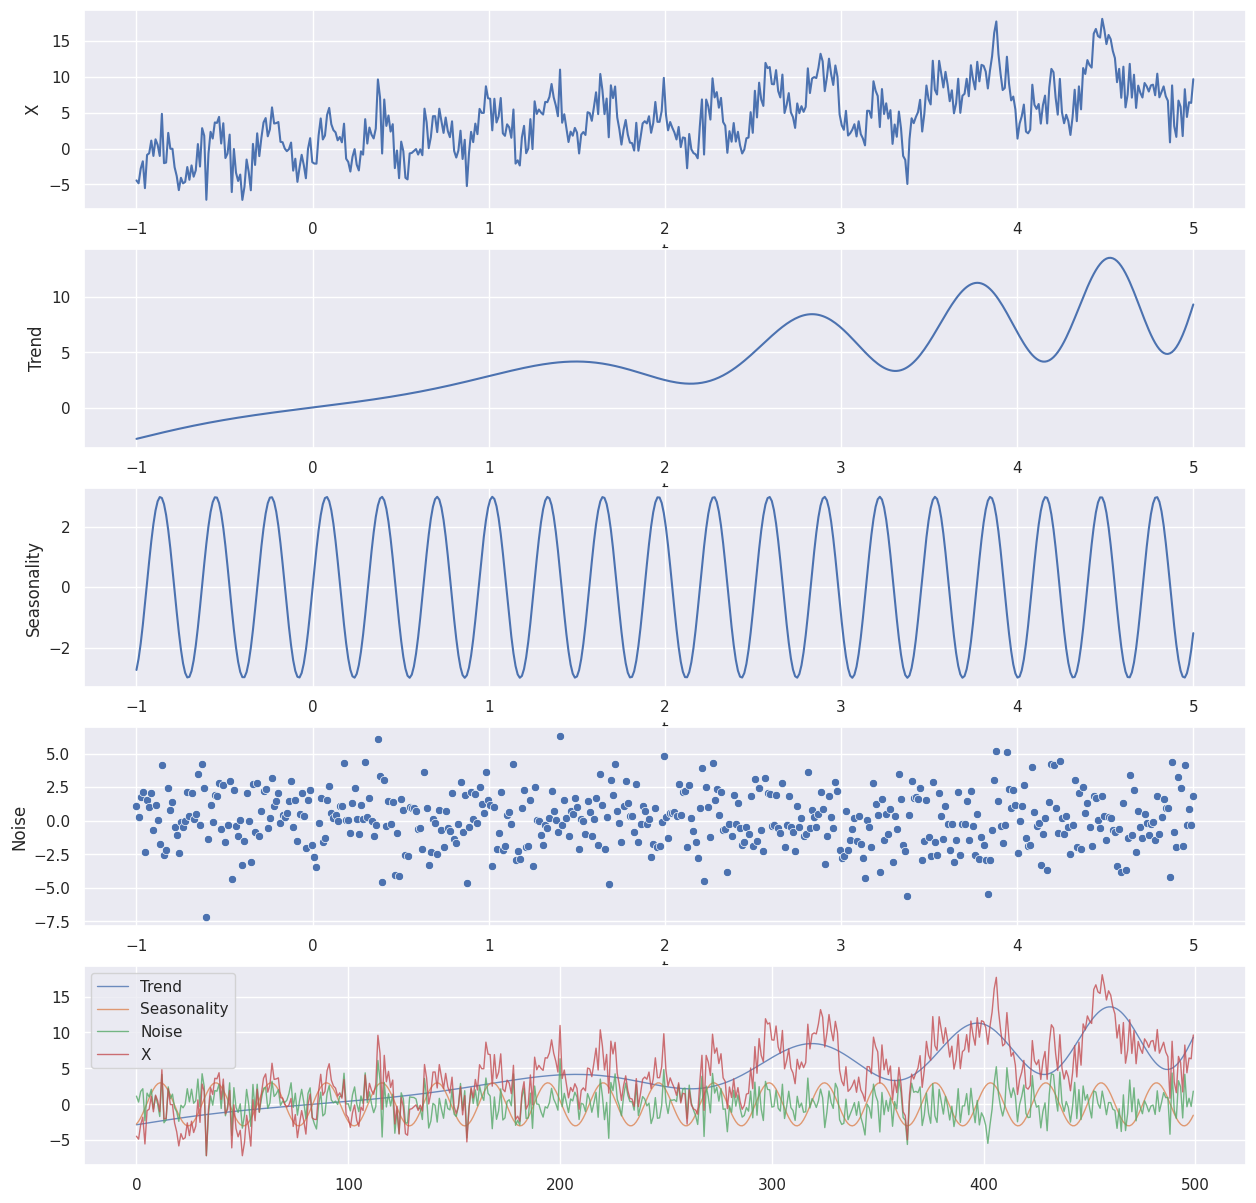

In [ ]:
# Plot out the time series and the "components" we used to create it
fig, axes = plt.subplots(5,1, figsize=(15, 15))
sns.lineplot(x='t', y='X', data=df_decomp, ax=axes[0])
sns.lineplot(x='t', y='Trend', data=df_decomp, ax=axes[1])
sns.lineplot(x='t', y='Seasonality', data=df_decomp, ax=axes[2])
sns.scatterplot(x='t', y='Noise', data=df_decomp, ax=axes[3])

sns.set(rc={'figure.figsize':(12,6)})
sns.lineplot(data=df_decomp[["Trend", "Seasonality", "Noise", "X"]], legend="full",lw=1, dashes=False, alpha=0.8, ax=axes[4])
# sns_plot.get_figure().savefig("components.png")

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_decomp['X'], period=26, model='additive')

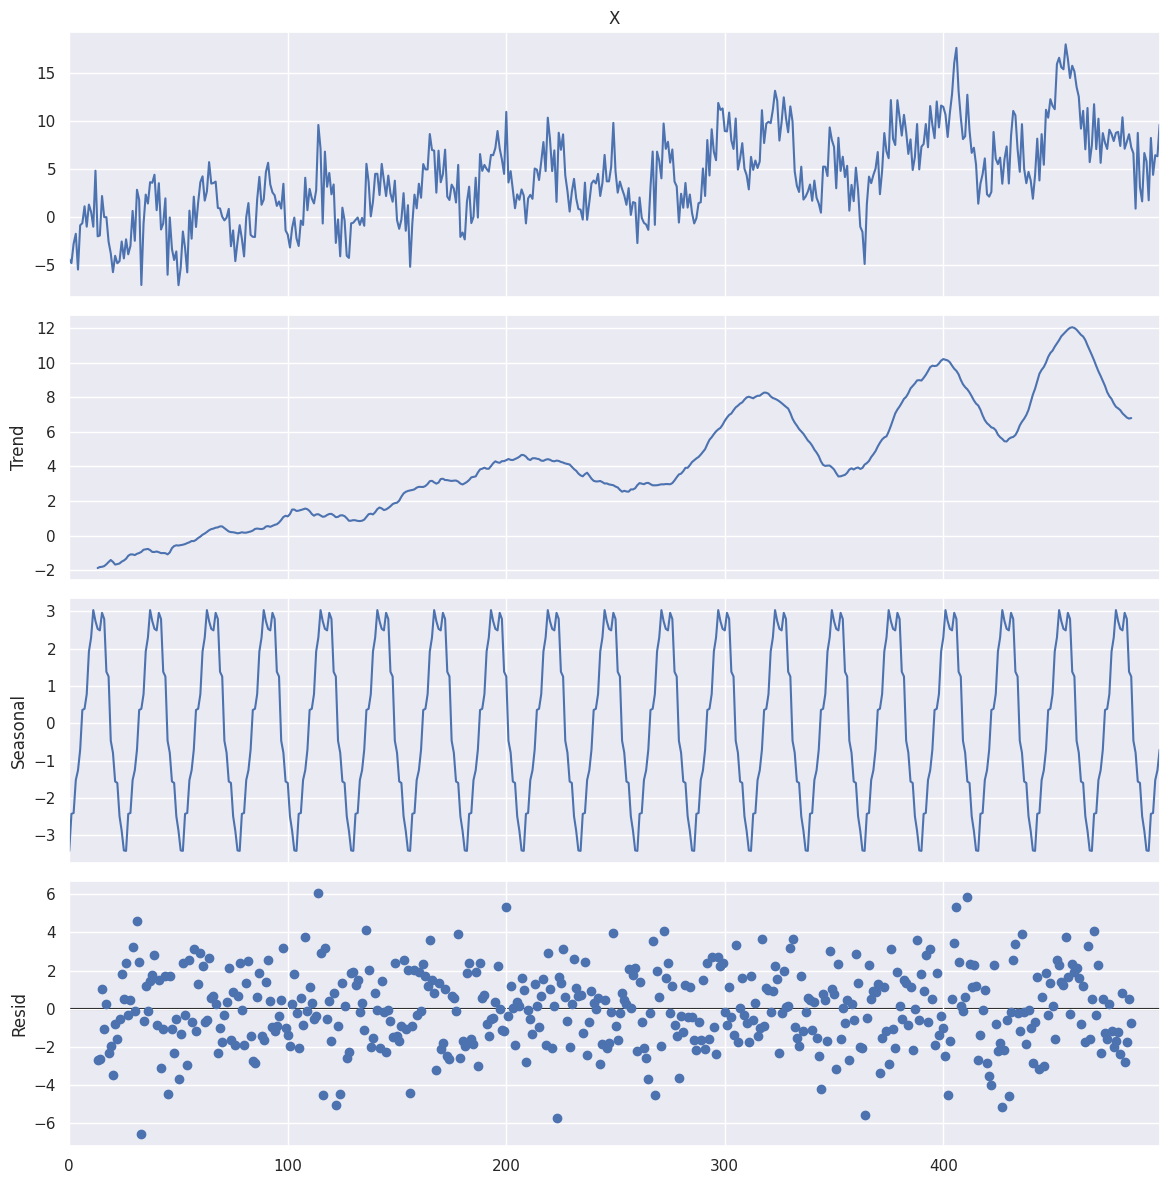

In [ ]:
# enlarge the figure to make it easy to see the details.
sns.set(rc={'figure.figsize':(12,12)})
result.plot();

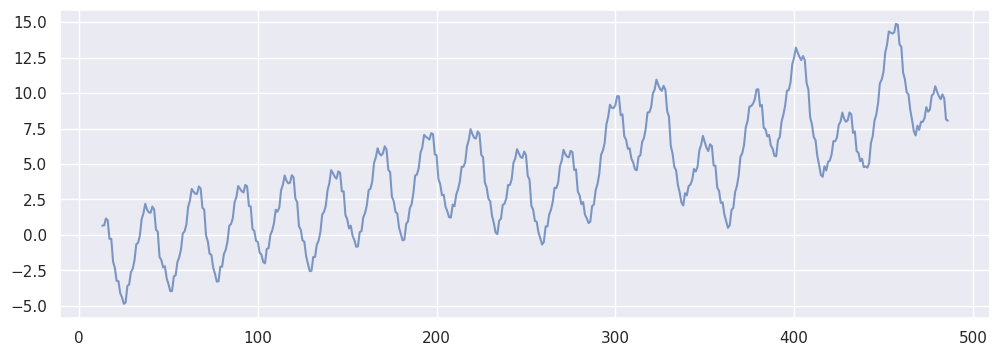

In [ ]:
# Try to compare the component decomposed from the time series against the component we used to construct the time series
plt.figure(figsize=(12,4))
#plt.plot(f_seasonality)
#plt.plot(df["X"])
plt.plot(result.seasonal + result.trend, alpha=0.7)

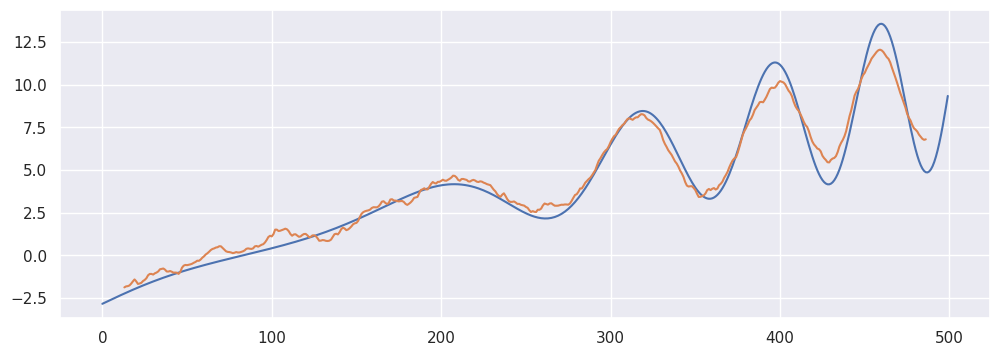

In [ ]:
# Get a better trend line
plt.figure(figsize=(12,4))
plt.plot(f_trend)
plt.plot(result.trend)

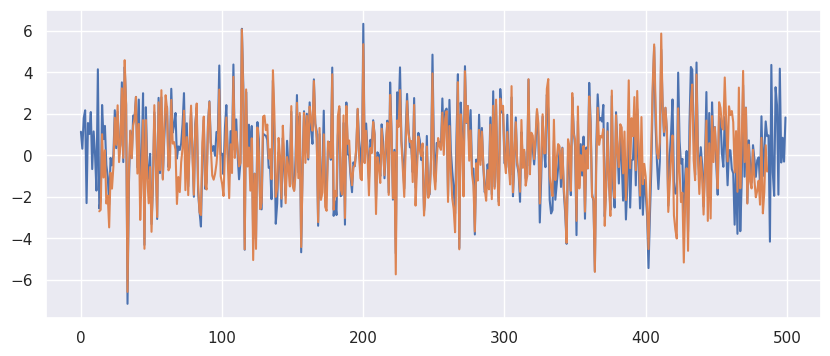

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(f_noise)
plt.plot(result.resid)

In [ ]:
np.mean(f_noise)

0.13856621365385605

In [ ]:
np.mean(result.resid)

-0.018459440193828957

In [ ]:
np.abs(np.std(f_noise)-np.std(result.resid))/np.std(f_noise)

0.0030519885014762926

(array([  3.,  10.,  21.,  83., 100., 106.,  84.,  50.,  13.,   4.]),
 array([-6.57784437, -5.31272407, -4.04760376, -2.78248345, -1.51736314,
        -0.25224283,  1.01287748,  2.27799779,  3.5431181 ,  4.80823841,
         6.07335872]),
 <BarContainer object of 10 artists>)

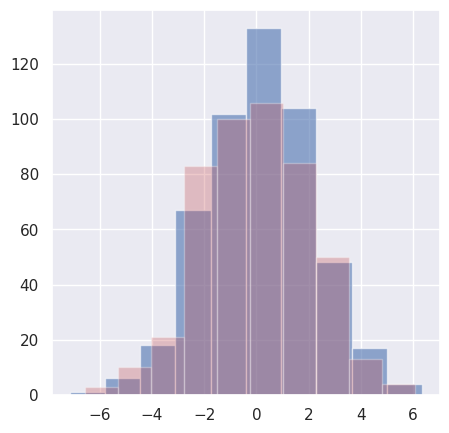

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(f_noise, alpha=0.6)
plt.hist(result.resid, alpha=0.3, color="r")

In [ ]:
df_decomp["detrend"] = df_decomp["X"] - result.trend
df_decomp["stationary"] = df_decomp["X"] - result.trend - result.seasonal

<Axes: >

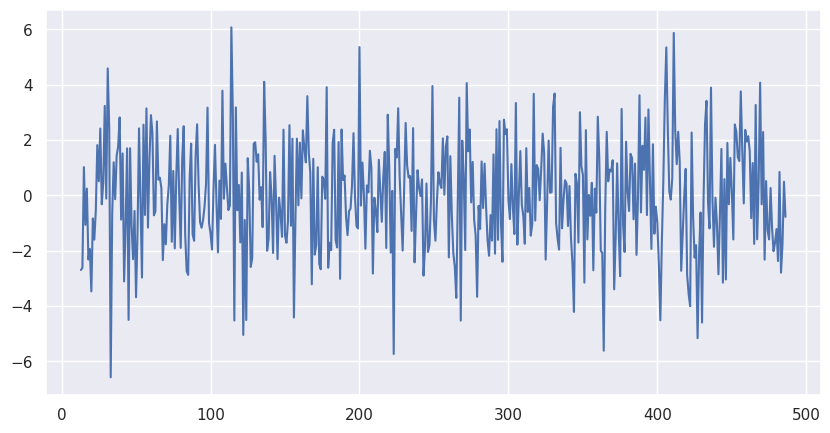

In [ ]:
df_decomp["stationary"].plot(figsize=(10,5))

## ARIMA Model and Forecasting

In [ ]:
df

,load
date,
2017-01-01,220989.4
2017-01-02,235680.6
2017-01-03,237534.1
2017-01-04,247560.4
2017-01-05,251129.3
...,...
2021-11-26,250892.4
2021-11-27,252661.7
2021-11-28,252618.8


In [ ]:
# It is not a good practice to replace missing time series data with medians or means.
# Instead, it is usally a better choice to use forward filling, backward
# filling, linear interpolation, mean of nearest neighbours, etc.
df_filled=df.bfill().ffill()

In [ ]:
df_filled.info()
df_filled

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1793 entries, 2017-01-01 to 2021-11-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   load    1793 non-null   float64
dtypes: float64(1)
memory usage: 28.0 KB


,load
date,
2017-01-01,220989.4
2017-01-02,235680.6
2017-01-03,237534.1
2017-01-04,247560.4
2017-01-05,251129.3
...,...
2021-11-26,250892.4
2021-11-27,252661.7
2021-11-28,252618.8


In [ ]:
# let's try to resample the data every 5 days and output the mean value.

df_5days_mean = df_filled[["load"]].resample("5d").mean(); df_5days_mean

,load
date,
2017-01-01,238578.76
2017-01-06,279333.26
2017-01-11,245153.42
2017-01-16,243152.44
2017-01-21,233211.46
...,...
2021-11-06,257994.46
2021-11-11,261993.96
2021-11-16,274947.28


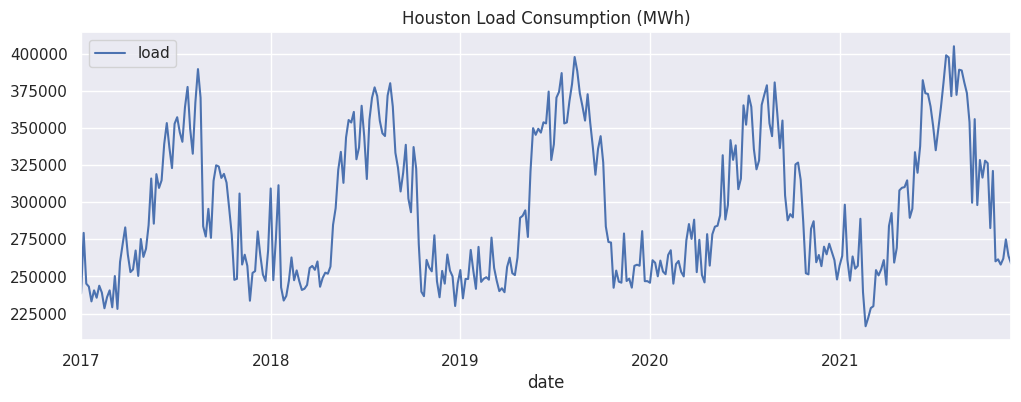

In [ ]:
sns.set(rc={'figure.figsize':(12,4)})
df_5days_mean.plot(title="Houston Load Consumption (MWh)");

In [ ]:
# aggregate the data to get the weekly max

df_weekly_max = df_filled[["load"]].resample("w").max(); df_weekly_max

,load
date,
2017-01-01,220989.4
2017-01-08,311023.7
2017-01-15,256713.7
2017-01-22,252867.8
2017-01-29,248290.5
...,...
2021-11-07,275040.3
2021-11-14,279495.5
2021-11-21,298277.6


<Axes: xlabel='date'>

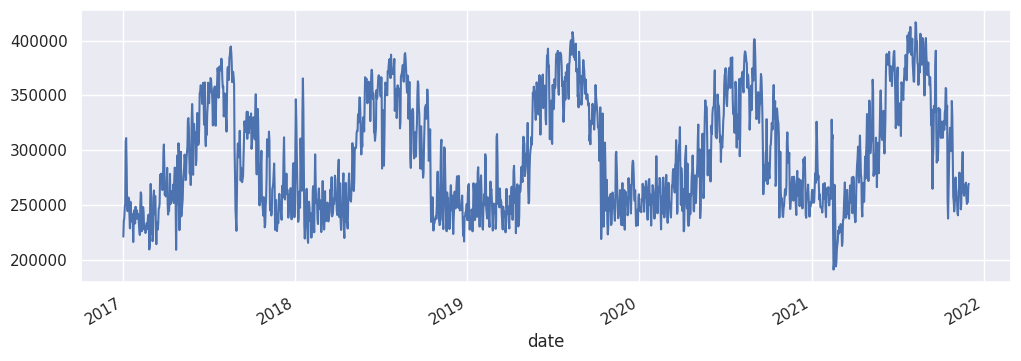

In [ ]:
df_filled["load"].plot()

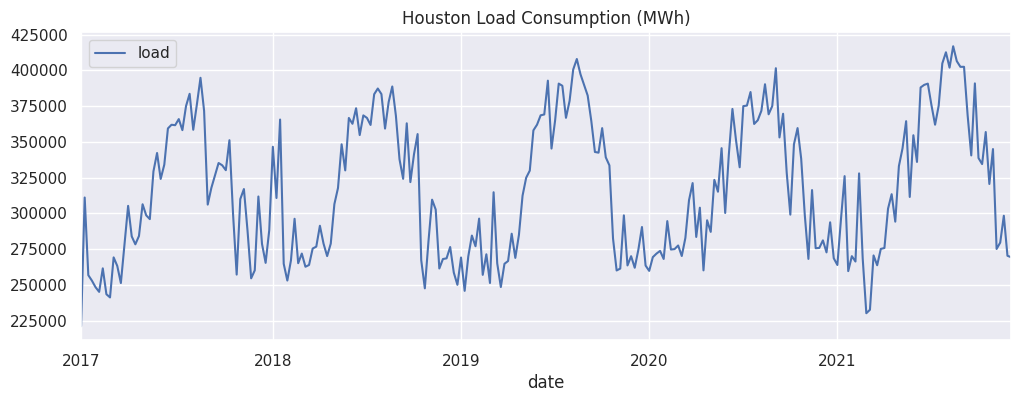

In [ ]:
df_weekly_max.plot(title="Houston Load Consumption (MWh)");

In [ ]:
# let's try to resample monthly and output the monthly median

df_monthly_median = df_filled[["load"]].resample("m").median(); df_monthly_median

,load
date,
2017-01-31,241425.80
2017-02-28,233570.45
2017-03-31,257173.40
2017-04-30,256315.30
2017-05-31,289705.80
2017-06-30,325784.65
2017-07-31,357156.30
2017-08-31,358407.50
2017-09-30,314116.20


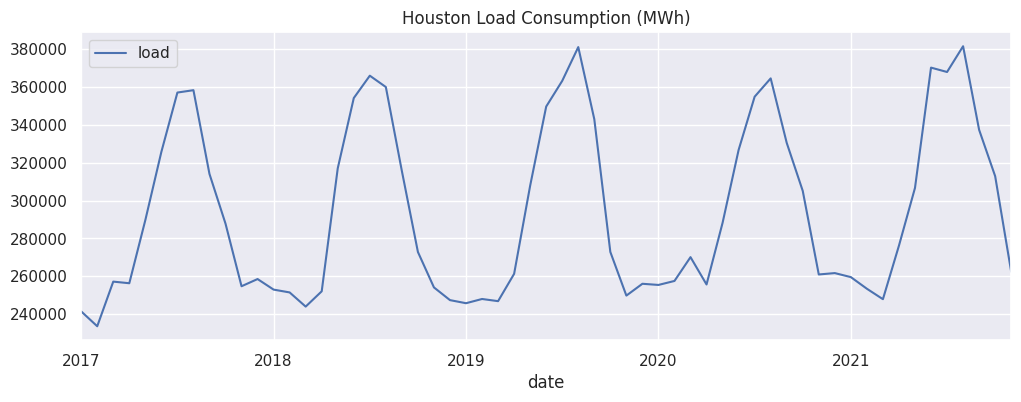

In [ ]:
df_monthly_median.plot(title="Houston Load Consumption (MWh)");

In [ ]:
# center = True below means the rolling mean would be calculated and placed next
# to the center of the bin (with a width of 7 days). As a result, the first 3 and last
# 3 rows are NaNs.

df_7lags_rol = df_filled.rolling(window = 7, center = True).mean(); df_7lags_rol

,load
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,NaN
2017-01-04,258781.614286
2017-01-05,267822.100000
...,...
2021-11-26,258878.757143
2021-11-27,259997.585714
2021-11-28,NaN


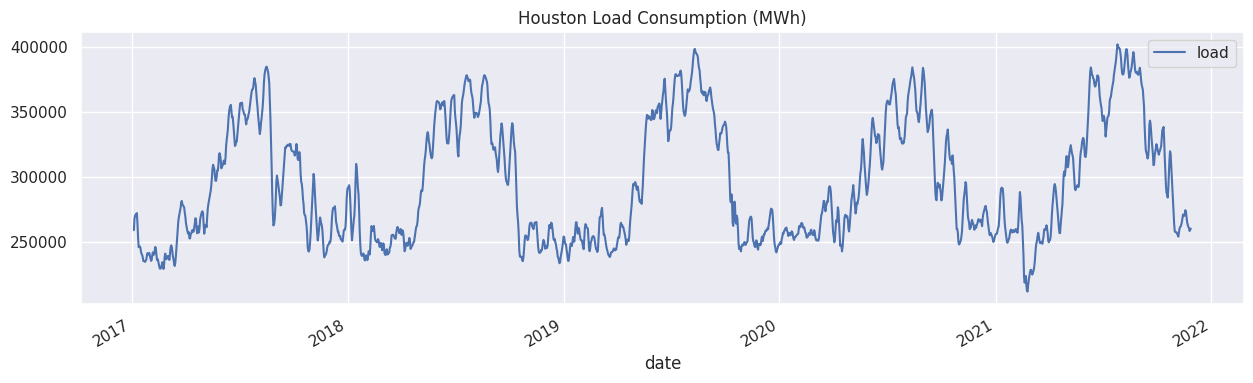

In [ ]:
df_7lags_rol.plot(title="Houston Load Consumption (MWh)", figsize=(15,4));

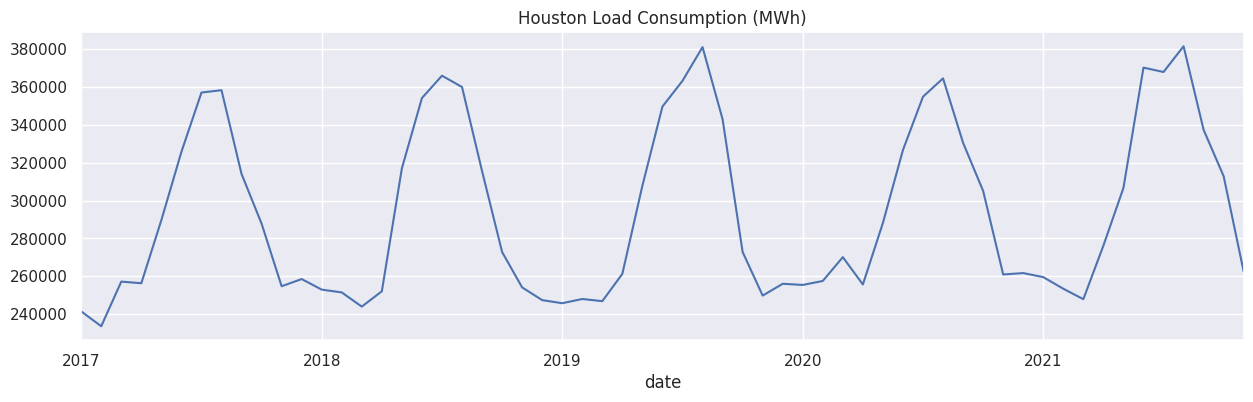

In [ ]:
df_monthly_median["load"].plot(title="Houston Load Consumption (MWh)", figsize=(15,4)).figure.savefig("energy.png");

In [ ]:
# Pandas has a builtin function for detrending. We can easily get the differencing with different orders.
df_1st_diff=df_filled.resample("d").median().diff(periods=1)

# Drop in NaN
df_1st_diff = df_1st_diff.dropna()

In [ ]:
print(df_1st_diff.isna().any().any())

False


<Axes: xlabel='date'>

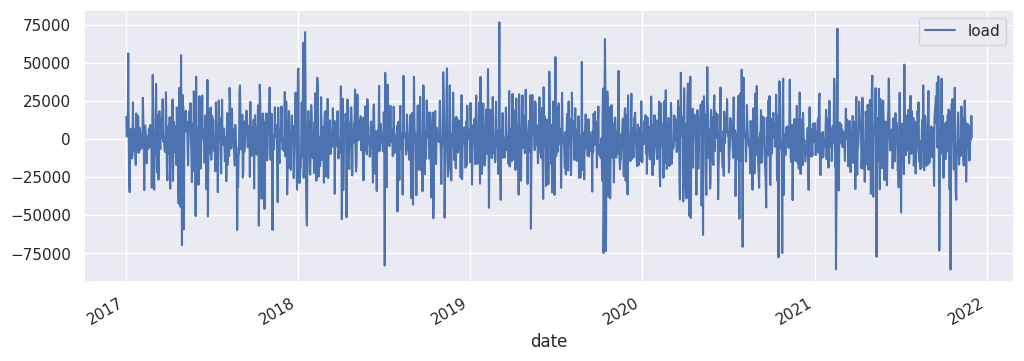

In [ ]:
df_1st_diff.plot()

In [ ]:
df_1st_diff = df_1st_diff[2:]

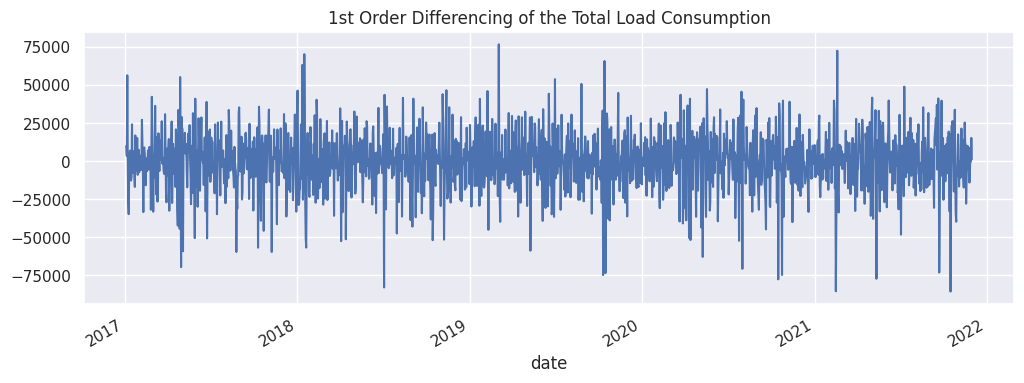

In [ ]:
df_1st_diff["load"].plot(title="1st Order Differencing of the Total Load Consumption").figure.savefig("energy.png");

In [ ]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [ ]:
kpss_test(df_1st_diff["load"])

Results of KPSS Test:
Test Statistic             0.040516
p-value                    0.100000
Lags Used                174.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


<ipython-input-267-f676df5b375f>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [ ]:
# ADF test for checking the stationarity of a time series.
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
adf_test(df_1st_diff["load"])

Results of Dickey-Fuller Test:
Test Statistic                -1.229558e+01
p-value                        7.652609e-23
#Lags Used                     2.200000e+01
Number of Observations Used    1.765000e+03
Critical Value (1%)           -3.434060e+00
Critical Value (5%)           -2.863179e+00
Critical Value (10%)          -2.567643e+00
dtype: float64


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

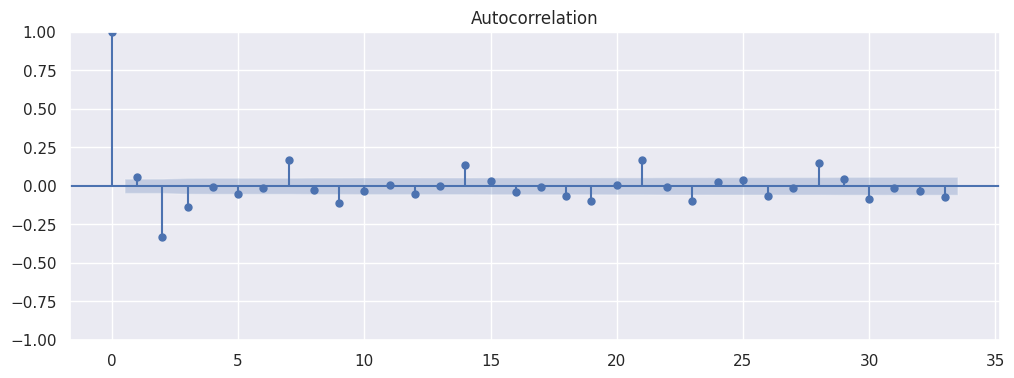

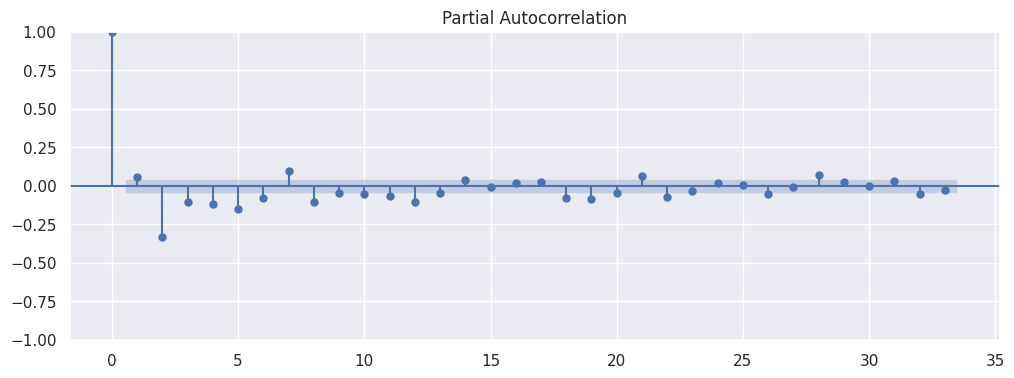

In [ ]:
sns.set(rc={'figure.figsize':(12,4)})
plot_acf(df_1st_diff["load"]);
plot_pacf(df_1st_diff["load"]);

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

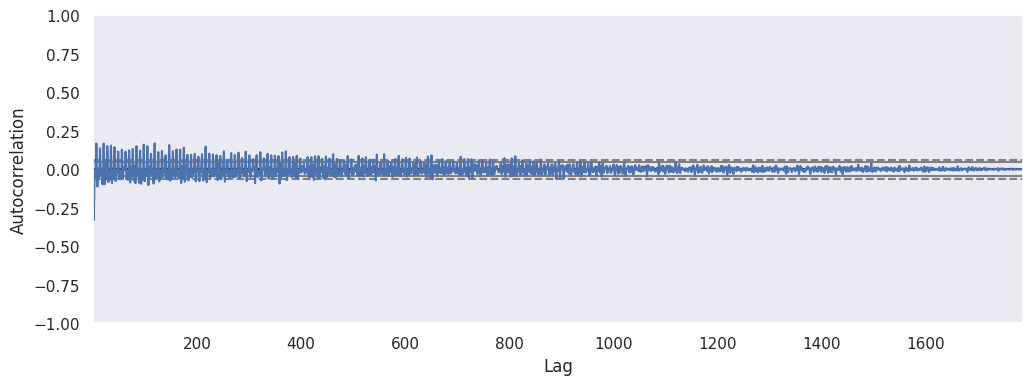

In [ ]:
pd.plotting.autocorrelation_plot(df_1st_diff["load"])

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# We must skip the first NaN due to the differencing. If we don't, the NaN will contaminate the rest of the calculations.
X = df_filled["load"]

In [ ]:
X

date
2017-01-01    220989.4
2017-01-02    235680.6
2017-01-03    237534.1
2017-01-04    247560.4
2017-01-05    251129.3
                ...   
2021-11-26    250892.4
2021-11-27    252661.7
2021-11-28    252618.8
2021-11-29    267948.6
2021-11-30    269260.3
Name: load, Length: 1793, dtype: float64

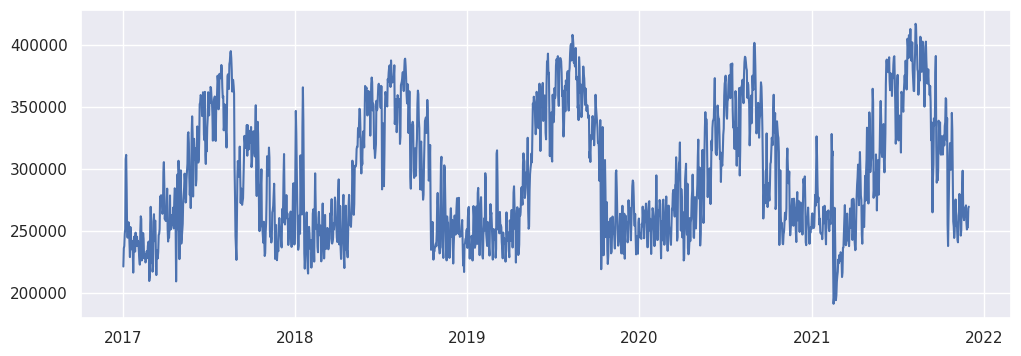

In [ ]:
plt.plot(X)

In [ ]:
train_size = len(X) - 30
X_train, X_test = X[:train_size], X[train_size:]


In [ ]:
# fill in NaN Values for X and X_train
X_train=df.bfill().ffill()
X_test=df.bfill().ffill()

In [ ]:
X.shape

(1793,)

In [ ]:
X_train.shape

(1793, 1)

In [ ]:
X_test.shape

(1793, 1)

In [ ]:
model_ar = AutoReg(X_train, lags=[1, 2, 3, 4])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
model_ar_fit = model_ar.fit()

In [ ]:
ar_predict = model_ar_fit.predict(start=1793, end=1793)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


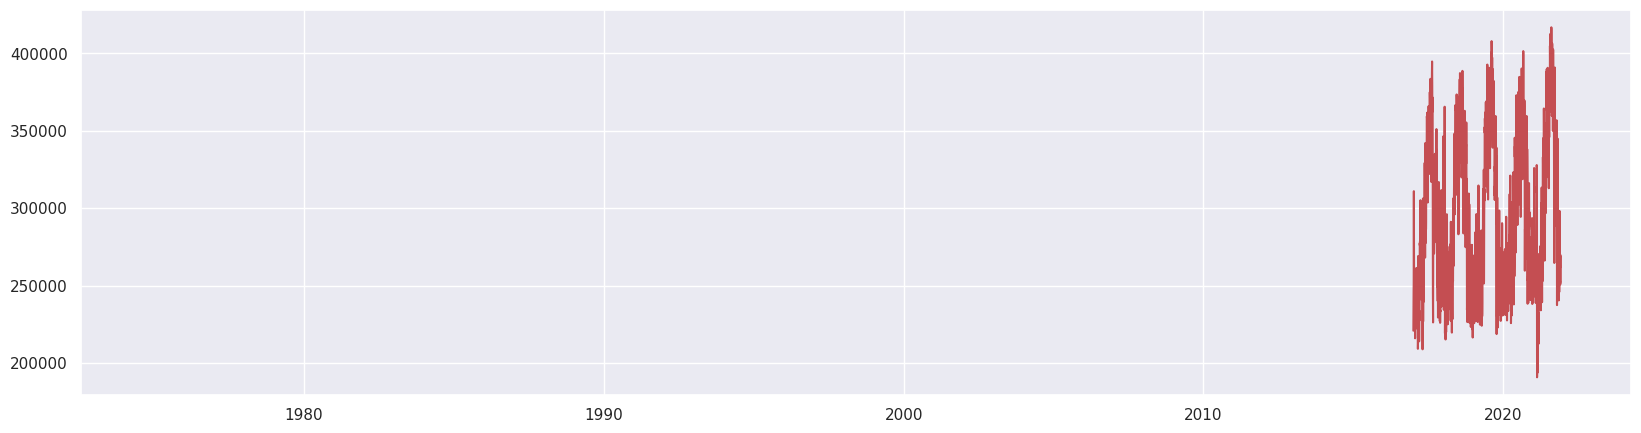

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(ar_predict)
plt.plot(X_test, c="r")

In [ ]:
# ARIMA needs three parameters: p, d, q.
# p = periods taken for autoregressive model
# d = integrated order, difference
# q = periods in moving average model
model_arima = ARIMA(X_train, order=(2,1,0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

40192.078898878826


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


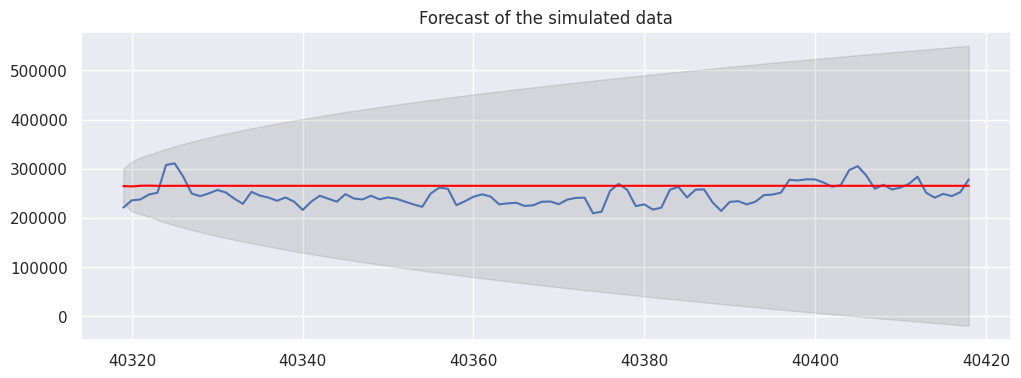

In [ ]:
n_pred = 100 # Lead time, or forecasting horizon -- the number of steps ahead for out of sample forecast
pred_array = model_arima_fit.get_forecast(steps=n_pred,alpha=0.03).summary_frame() # alpha: confidence level
plt.figure(figsize=(12,4))
pred_array_index = range(40319, 40419)
plt.plot(pred_array_index, X_test[:100])
plt.plot(pred_array_index, pred_array['mean'], color = "red")
plt.fill_between(pred_array_index, pred_array['mean_ci_lower'], pred_array['mean_ci_upper'], color = "k", alpha = .10 )
plt.title('Forecast of the simulated data')
plt.show()

In [ ]:
# data  : the train data in forms of numpy array
# order : the maximum order of p, d, q for the grid search
# return: optimal (p, d, q)

# example: myorder = arima_order(X_train)

def arima_order(data, order=10, verbose=True):
  import warnings
  import itertools
  p=d=q=range(0,order)
  pdq = list(itertools.product(p,d,q))
  warnings.filterwarnings("ignore")
  aic_pair={}
  min_aic=9999999
  min_order=(0,0,0)
  for o in pdq:
    try:
      model_arima = ARIMA(data, order=o)
      model_arima_fit=model_arima.fit()
      fit_aic = model_arima_fit.aic
      if verbose: print(o, fit_aic)
      if not np.isnan(fit_aic):
        if min_aic>fit_aic:
          min_aic = fit_aic
          min_order=o
      aic_pair.update({o, rmodel_arima_fit.aic})
    except:
      continue
  return min_order

In [ ]:
model_arima = ARIMA(X_train, order=(2,0,2))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


40098.971539984326


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


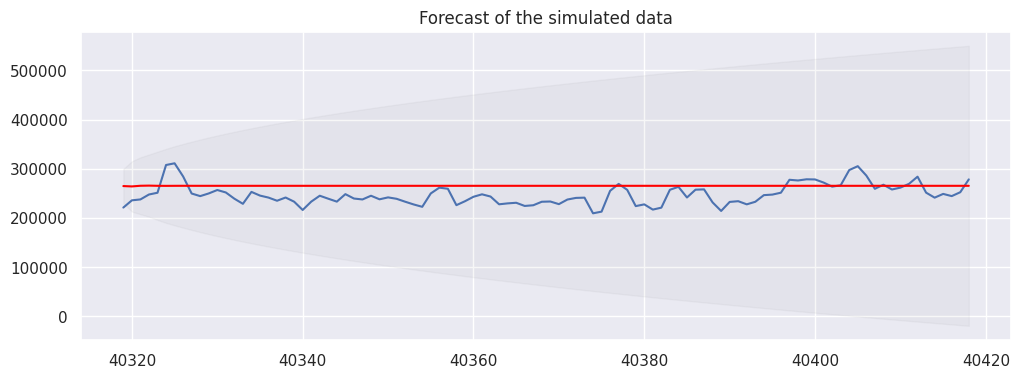

In [ ]:
n_pred = 100 # Lead time, or forecasting horizon -- the number of steps ahead for out of sample forecast
pred_array = model_arima_fit.get_forecast(steps=n_pred,alpha=0.03).summary_frame() # alpha: confidence level
plt.figure(figsize=(12,4))
pred_array_index = range(40319, 40419)
plt.plot(pred_array_index, X_test[:100])
plt.plot(pred_array_index, pred_array['mean'], color = "red")
plt.fill_between(pred_array_index, pred_array['mean_ci_lower'], pred_array['mean_ci_upper'], color = "k", alpha = .03 )

plt.title('Forecast of the simulated data')
plt.show()

In [ ]:
def inverse_difference(h, x, interval=1):
	return x + h[-interval]

In [ ]:
history = [x for x in X]
day =1
forecast = model_arima_fit.get_forecast(steps=30).summary_frame()
for y in forecast['mean']:
	inverted = inverse_difference(history, y)
	print('Day %d: %6.2f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: 533960.86
Day 2: 797952.28
Day 3: 1063278.17
Day 4: 1328910.26
Day 5: 1594158.52
Day 6: 1859287.71
Day 7: 2124525.18
Day 8: 2389806.16
Day 9: 2655057.26
Day 10: 2920293.14
Day 11: 3185537.03
Day 12: 3450786.09
Day 13: 3716033.07
Day 14: 3981278.34
Day 15: 4246524.13
Day 16: 4511770.46
Day 17: 4777016.68
Day 18: 5042262.73
Day 19: 5307508.80
Day 20: 5572754.92
Day 21: 5838001.04
Day 22: 6103247.14
Day 23: 6368493.25
Day 24: 6633739.35
Day 25: 6898985.46
Day 26: 7164231.57
Day 27: 7429477.68
Day 28: 7694723.78
Day 29: 7959969.89
Day 30: 8225216.00


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


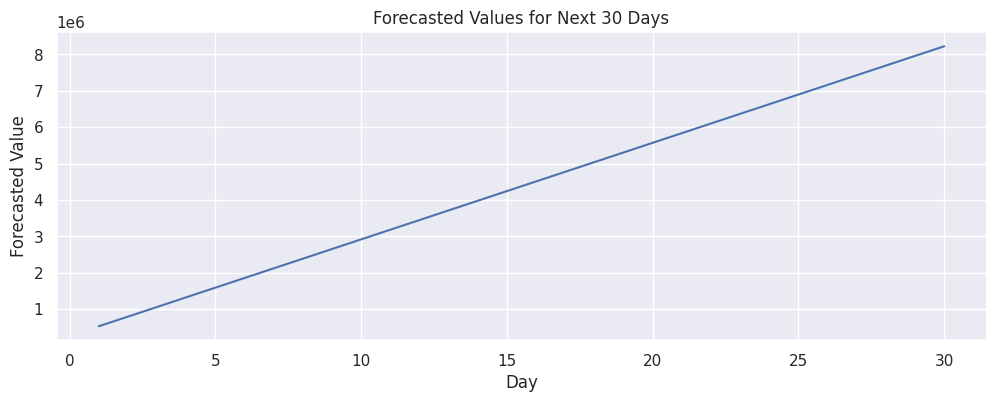

In [ ]:
import matplotlib.pyplot as plt

history = [x for x in X]
day = 1
forecast = model_arima_fit.get_forecast(steps=30).summary_frame()

# List to store forecasted values
forecast_values = []

for y in forecast['mean']:
    inverted = inverse_difference(history, y)
    forecast_values.append(inverted)
    history.append(inverted)
    day += 1

# Plot the forecasted values
plt.plot(range(1, len(forecast_values) + 1), forecast_values, linestyle='-')
plt.xlabel('Day')
plt.ylabel('Forecasted Value')
plt.title('Forecasted Values for Next 30 Days')
plt.grid(True)
plt.show()

In [ ]:
print("The load values for electricity load of Houston seems to be linearly increasing over a 30 day span.")

The load values for electricity load of Houston seems to be linearly increasing over a 30 day span.


In [ ]:
print("This would make sense since the consumption of individuals would only grow as the days continue through the month. Historically, there are strecthes in the data that show a strong linear increase")

This would make sense since the consumption of individuals would only grow as the days continue through the month. Historically, there are strecthes in the data that show a strong linear increase


In [ ]:
print("The lowest load ends up being on the first day, while the largest load ends up being on the last day.")

The lowest load ends up being on the first day, while the largest load ends up being on the last day.


In [ ]:
print("However, I am not sure if this prediction is accuarte since the load doesn't seem to increase this much in a 30 day psan from the data in the dataset.")

However, I am not sure if this prediction is accuarte since the load doesn't seem to increase this much in a 30 day psan from the data in the dataset.


In [ ]:
print("This may be due to a fault in the model or something else in the scripts.")

This may be due to a fault in the model or something else in the scripts.
